
# Comments on what this notebook does:

+ Loading of different data sets 
+ Declaration of data for the pipelin

# Pipeline for the preparation
+ Fill missing nans with mean of column
+ Get rid of the last remaining columns which seem non relevant 
+ One hot encoding 
+ Droping of category columns 
+ Label Encoding of IT column -> Mapping of categorical variables with many Items 
+ Scaler 
+ Test Train split 

# Models 
+ making of the models 
+ training of the models 
+ prediction with the models 

# Evaluation of Models 
+ RMSE 
+ Residuents 
 

# Import Libraries

In [208]:
# First of all import the required libraries 
# Data and math  
import pandas as pd
import numpy as np 
import pyarrow.parquet as pq

# Visualisation 
import matplotlib.pyplot as plt  # für Matplotlib
import seaborn as sns            # für Seaborn
import plotly.express as px      # für Plotly Express
#%matplotlib inline

# Import System Libraries 
import warnings
import os
# Ignor all warnings, because there is a front problem with mach 
warnings.filterwarnings("ignore")

# Import Machine Learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [209]:
# Importing Data 
# Path to the neighboring 'data' folder
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data'))


In [210]:

# Big Dataframe 
df_big = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Big.csv'))
print("Shape of tillmanns big df:", df_big.shape)
print(df_big.head())

# Big Diesel only Dataframe 
df_diesel = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Diesel.csv'))
print("Shape of tillmanns diesel df:", df_diesel.shape)
print(df_diesel.head())

# Big Petrol only Dataframe 
df_petrol = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Petrol.csv'))
print("Shape of tillmanns petrol df:", df_petrol.shape)
print(df_petrol.head())


Shape of tillmanns big df: (8095869, 21)
       Mk  Ct  Cr  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  \
0  SUZUKI  M1  M1  1045.0  1151.0         135.0  2450.0    1510.0    1515.0   
1  SUZUKI  M1  M1   915.0  1051.0         115.0  2450.0    1530.0    1530.0   
2  SUZUKI  M1  M1   915.0  1051.0         115.0  2450.0    1520.0    1520.0   
3   SKODA  M1  M1  1560.0     NaN         146.0  2836.0    1578.0    1566.0   
4     BMW  M1  M1  1490.0  1578.0         149.0  2670.0    1563.0    1562.0   

       Ft  ... ec (cm3)  ep (KW)  z (Wh/km)      IT  De   Vf  ech  RLFI  \
0  PETROL  ...   1373.0    103.0        NaN     NaN NaN  0.0  NaN   NaN   
1  PETROL  ...   1242.0     66.0        NaN     NaN NaN  0.0  NaN   NaN   
2  PETROL  ...   1242.0     66.0        NaN     NaN NaN  0.0  NaN   NaN   
3  DIESEL  ...   1968.0    110.0        NaN     NaN NaN  0.0  NaN   NaN   
4  PETROL  ...   1499.0    103.0        NaN  e24 19 NaN  0.0  NaN   NaN   

   Electric range (km)  #identica

In [211]:

# Big Diesel only Dataframe 
df_small = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Small.csv'))
print("Shape of tillmanns small df:", df_small.shape)
print(df_small.head())

# Big Petrol only Dataframe 
df_smallsmall = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_SmallSmall.csv'))
print("Shape of tillmanns small small df:", df_smallsmall.shape)
print(df_smallsmall.head())

Shape of tillmanns small df: (80959, 21)
           Mk   Ct   Cr  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  \
0         BMW   M1   M1  1920.0  2067.0         191.0  2975.0    1599.0   
1  VOLKSWAGEN   M1   M1  1567.0  1694.0         129.0  2786.0    1578.0   
2         BMW  M1G  M1G  1910.0  2107.0         159.0  2864.0    1620.0   
3       SKODA   M1   M1  1686.0  1847.0         163.0  2788.0    1585.0   
4       SKODA  M1G  M1G  1772.0  1941.0         182.0  2788.0    1566.0   

   At2 (mm)      Ft  ... ec (cm3)  ep (KW)  z (Wh/km)         IT  De   Vf  \
0    1624.0  DIESEL  ...   2993.0    235.0        NaN      E24 9 NaN  0.0   
1    1578.0  DIESEL  ...   1968.0     90.0        NaN  e13 17 19 NaN  NaN   
2    1636.0  DIESEL  ...   1995.0    140.0        NaN   E24 3 27 NaN  NaN   
3    1575.0  DIESEL  ...   1968.0    110.0        NaN        NaN NaN  NaN   
4    1576.0  DIESEL  ...   1968.0    140.0        NaN      E8 19 NaN  NaN   

   ech  RLFI  Electric range (km)  #identical

In [212]:
# Declare df for ML data preparation pipeline 
data = df_petrol
data.head()
print(data.dtypes)

Mk                        object
Ct                        object
Cr                        object
m (kg)                   float64
Mt                       float64
Ewltp (g/km)             float64
W (mm)                   float64
At1 (mm)                 float64
At2 (mm)                 float64
Fm                        object
ec (cm3)                 float64
ep (KW)                  float64
z (Wh/km)                float64
IT                        object
De                       float64
Vf                       float64
ech                      float64
RLFI                     float64
Electric range (km)      float64
#identical occurences    float64
dtype: object


# 1.A Outlier Handling 

In [213]:
# Outliers
# Exclude 'year' column and select numeric (float64) columns only
numeric_columns = data.select_dtypes(include='float64').columns

# IQR method for outlier removal
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a condition to filter out outliers
condition = ~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the condition to the DataFrame to remove outliers
data_clean = data[condition]

print(f"Original DataFrame shape: {data.shape}")
print(f"DataFrame shape after removing outliers: {data_clean.shape}")

Original DataFrame shape: (3892371, 20)
DataFrame shape after removing outliers: (2674994, 20)


In [214]:
data = data_clean
# Save in between
df_new1 = data

In [235]:
#data = df_new1

# 1.B Handle missing values (if any)


In [215]:

# Fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)
df_new0 = data

In [216]:
print(data.dtypes)

# Automatically find categorical columns (object or category dtype)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Replace NaNs in each categorical column with 'Missing'
data[categorical_columns] = data[categorical_columns].fillna('Missing')
# Check for NaN values in X_train
nans = data.isna().sum()

# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in:\n{nans_with_values}")


Mk                        object
Ct                        object
Cr                        object
m (kg)                   float64
Mt                       float64
Ewltp (g/km)             float64
W (mm)                   float64
At1 (mm)                 float64
At2 (mm)                 float64
Fm                        object
ec (cm3)                 float64
ep (KW)                  float64
z (Wh/km)                float64
IT                        object
De                       float64
Vf                       float64
ech                      float64
RLFI                     float64
Electric range (km)      float64
#identical occurences    float64
dtype: object
Columns with NaN values in:
ech     2674994
RLFI    2674994
dtype: int64


In [217]:
# Delete columns without meaning for the model
print(data.columns)

# List of columns to be dropped
list_columns_drop = ['Mk', 'Cr', 'ech', 'RLFI', '#identical occurences']

# Filter only the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in list_columns_drop if col in data.columns]

# Drop the existing columns
if existing_columns_to_drop:
    data.drop(existing_columns_to_drop, axis=1, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No columns to drop were found in the DataFrame.")

# Display the updated DataFrame
print(data.head())


Index(['Mk', 'Ct', 'Cr', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)',
       'At2 (mm)', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'De', 'Vf',
       'ech', 'RLFI', 'Electric range (km)', '#identical occurences'],
      dtype='object')
Dropped columns: ['Mk', 'Cr', 'ech', 'RLFI', '#identical occurences']
    Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm) Fm  ec (cm3)  \
4   M1  1490.0  1581.0         150.0  2670.0    1563.0    1562.0  M    1499.0   
5   M1  1490.0  1597.0         150.0  2670.0    1563.0    1562.0  M    1499.0   
6   M1  1535.0  1675.0         168.0  2670.0    1563.0    1562.0  M    1998.0   
8   M1   975.0  1081.0         128.0  2450.0    1520.0    1520.0  M    1242.0   
16  M1  1225.0  1348.0         147.0  2600.0    1535.0    1505.0  M    1373.0   

    ep (KW)   z (Wh/km)       IT        De   Vf  Electric range (km)  
4     103.0  170.822021   e24 19  0.018882  0.0             51.77193  
5     103.0  170.822021   e24 19  0.018882  0.0   

In [218]:
# Save in between
df_new2 = data


In [273]:
data = df_new2

In [274]:
# Solving the nan problem 
print(data.columns)
# Check for NaN values in X_train
nans = data.isna().sum()
# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in:\n{nans_with_values}")
print(data.tail())

Index(['Ct', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'De', 'Vf',
       'Electric range (km)'],
      dtype='object')
Columns with NaN values in:
Series([], dtype: int64)
         Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm) Fm  \
3892366  M1  1366.0  1439.0         125.0  2619.0    1549.0    1519.0  M   
3892367  M1  1140.0  1257.0         119.0  2580.0    1531.0    1536.0  M   
3892368  M1  1500.0  1619.0         151.0  2680.0    1615.0    1622.0  M   
3892369  M1  1730.0  1902.0         164.0  2851.0    1573.0    1587.0  M   
3892370  M1  1456.0  1537.0         133.0  2720.0    1562.0    1584.0  H   

         ec (cm3)  ep (KW)   z (Wh/km)        De   Vf  Electric range (km)  
3892366    1498.0     96.0  170.822021  0.018882  0.0             51.77193  
3892367     998.0     74.0  170.822021  0.018882  0.0             51.77193  
3892368    1598.0    110.0  170.822021  0.018882  0.0             

In [275]:
# List of problematic categorical columns
columns_category = ['Ct', 'Ft', 'Fm', 'IT']

# Loop through each column and print unique values
for col in columns_category:
    if col in data.columns:
        unique_values = data[col].unique()
        print(f"Unique values in column '{col}':\n{unique_values}\n")
    else:
        print(f"Column '{col}' does not exist in the DataFrame, skipping...\n")

Unique values in column 'Ct':
['M1' 'M1G' 'N1' 'Missing']

Column 'Ft' does not exist in the DataFrame, skipping...

Unique values in column 'Fm':
['M' 'B' 'H' 'P']

Column 'IT' does not exist in the DataFrame, skipping...



In [276]:
# Solving the nan problem 
print(data.columns)
# Check for NaN values in X_train
nans = data.isna().sum()
# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in:\n{nans_with_values}")
print(data.tail())
# Print columns with missing values
missing_values = data.isnull().sum()  # Count missing values in each column
missing_columns = missing_values[missing_values > 0]  # Filter to get only columns with missing values

# Display columns with missing values
print("Columns with missing values:")
print(missing_columns)

Index(['Ct', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'De', 'Vf',
       'Electric range (km)'],
      dtype='object')
Columns with NaN values in:
Series([], dtype: int64)
         Ct  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm) Fm  \
3892366  M1  1366.0  1439.0         125.0  2619.0    1549.0    1519.0  M   
3892367  M1  1140.0  1257.0         119.0  2580.0    1531.0    1536.0  M   
3892368  M1  1500.0  1619.0         151.0  2680.0    1615.0    1622.0  M   
3892369  M1  1730.0  1902.0         164.0  2851.0    1573.0    1587.0  M   
3892370  M1  1456.0  1537.0         133.0  2720.0    1562.0    1584.0  H   

         ec (cm3)  ep (KW)   z (Wh/km)        De   Vf  Electric range (km)  
3892366    1498.0     96.0  170.822021  0.018882  0.0             51.77193  
3892367     998.0     74.0  170.822021  0.018882  0.0             51.77193  
3892368    1598.0    110.0  170.822021  0.018882  0.0             

# 2. One-hot encode categorical variables

In [256]:
data.tail()

,Ct,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Fm,ec (cm3),ep (KW),z (Wh/km),IT,De,Vf,Electric range (km)
3892366,M1,1366.0,1439.0,125.0,2619.0,1549.0,1519.0,M,1498.0,96.0,170.822021,e1 29,0.018882,0.0,51.77193
3892367,M1,1140.0,1257.0,119.0,2580.0,1531.0,1536.0,M,998.0,74.0,170.822021,e5 29,0.018882,0.0,51.77193
3892368,M1,1500.0,1619.0,151.0,2680.0,1615.0,1622.0,M,1598.0,110.0,170.822021,e5 29,0.018882,0.0,51.77193
3892369,M1,1730.0,1902.0,164.0,2851.0,1573.0,1587.0,M,1998.0,190.0,170.822021,e24 29 37,0.018882,0.0,51.77193
3892370,M1,1456.0,1537.0,133.0,2720.0,1562.0,1584.0,H,1332.0,103.0,170.822021,e2 33 37,0.018882,0.0,51.77193


In [278]:
# List of columns to be one-hot encoded
columns_to_encode = ['Ct', 'Ft', 'Fm']

# Filter only the columns that exist in the DataFrame
existing_columns_to_encode = [col for col in columns_to_encode if col in data.columns]
print(existing_columns_to_encode)

if existing_columns_to_encode:
    # Check for NaNs in the columns to encode
    for col in existing_columns_to_encode:
        if data[col].isna().any():
            # Fill NaNs with a placeholder value, e.g., 'Missing'
            data[col].fillna('Missing', inplace=True)

    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

    # Fit and transform the existing columns
    encoded_features = encoder.fit_transform(data[existing_columns_to_encode])

    # Convert the encoded features into a DataFrame with meaningful column names
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(existing_columns_to_encode))

    # Concatenate the new one-hot encoded columns back to the original DataFrame (drop the original columns first)
    data_new = pd.concat([data.drop(existing_columns_to_encode, axis=1), encoded_df], axis=1)

    # Display the updated DataFrame
    print(data_new.head())
    print(data_new.tail())
else:
    print("No columns to encode were found in the DataFrame.")


['Ct', 'Fm']
    m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  ec (cm3)  \
4   1490.0  1581.0         150.0  2670.0    1563.0    1562.0    1499.0   
5   1490.0  1597.0         150.0  2670.0    1563.0    1562.0    1499.0   
6   1535.0  1675.0         168.0  2670.0    1563.0    1562.0    1998.0   
8    975.0  1081.0         128.0  2450.0    1520.0    1520.0    1242.0   
16  1225.0  1348.0         147.0  2600.0    1535.0    1505.0    1373.0   

    ep (KW)   z (Wh/km)        De   Vf  Electric range (km)  Ct_M1G  \
4     103.0  170.822021  0.018882  0.0             51.77193     0.0   
5     103.0  170.822021  0.018882  0.0             51.77193     0.0   
6     141.0  170.822021  0.018882  0.0             51.77193     0.0   
8      66.0  170.822021  0.018882  0.0             51.77193     0.0   
16    103.0  170.822021  0.018882  0.0             51.77193     0.0   

    Ct_Missing  Ct_N1  Fm_H  Fm_M  Fm_P  
4          0.0    0.0   0.0   1.0   0.0  
5          0.0    0.0   0.0   1

In [283]:
data = data_new.dropna()

In [284]:

# Solving the nan problem 
print(data.columns)
# Check for NaN values in X_train
nans = data.isna().sum()
# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in:\n{nans_with_values}")
print(data.tail())
# Print columns with missing values
missing_values = data.isnull().sum()  # Count missing values in each column
missing_columns = missing_values[missing_values > 0]  # Filter to get only columns with missing values

# Display columns with missing values
print("Columns with missing values:")
print(missing_columns)

Index(['m (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'De', 'Vf', 'Electric range (km)',
       'Ct_M1G', 'Ct_Missing', 'Ct_N1', 'Fm_H', 'Fm_M', 'Fm_P'],
      dtype='object')
Columns with NaN values in:
Series([], dtype: int64)
         m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  ec (cm3)  \
2674989  1116.0  1260.0         124.0  2455.0    1441.0    1435.0     999.0   
2674990  1116.0  1264.0         129.0  2455.0    1441.0    1435.0     999.0   
2674991  1160.0  1293.0         134.0  2455.0    1441.0    1435.0     999.0   
2674992  1116.0  1268.0         126.0  2455.0    1441.0    1435.0     999.0   
2674993  1160.0  1285.0         132.0  2455.0    1441.0    1435.0     999.0   

         ep (KW)   z (Wh/km)        De   Vf  Electric range (km)  Ct_M1G  \
2674989     70.0  170.822021  0.018882  0.0             51.77193     0.0   
2674990     70.0  170.822021  0.018882  0.0             51.77193     0.0   
267499

In [285]:
# Save in between
df_new3 = data


# 3 Label Encoding of IT column 

In [223]:
"""

# Get unique values in 'IT' column
unique_IT_values = data['IT'].unique()

# Create a mapping from categorical values to numerical values
IT_mapping = {category: idx for idx, category in enumerate(unique_IT_values)}

# Print the mapping (for reference)
print("Mapping of IT categories to numerical values:")
print(IT_mapping)

# Apply the mapping to the 'IT' column
data['IT_mapped'] = data['IT'].map(IT_mapping)

# Now 'IT_mapped' will contain the numerical representation of the 'IT' column
print(data[['IT', 'IT_mapped']].head())

# Later, to reverse the mapping, you can do:
reverse_IT_mapping = {v: k for k, v in IT_mapping.items()}


"""

Mapping of IT categories to numerical values:
{'e24 19': 0, 'Missing': 1, 'e8 19': 2, 'E1 8': 3, 'E1 2': 4, 'e11 19': 5, 'e13 19': 6, 'e6 19': 7, 'e24  19': 8, 'e9 19': 9, 'e24 9': 10, 'e24 19 9': 11, 'e1 8': 12, 'E24 19': 13, '17;19': 14, 'e24 9 19': 15, 'e1 2': 16, 'e1 9': 17, 'E1 9': 18, '17 19': 19, 'e24 10': 20, 'e1 19': 21, 'E24 9': 22, 'e1 08': 23, 'e 24 9': 24, 'e 24 19': 25, 'e3 17 19': 26, 'e3 17': 27, 'E13 19': 28, 'E8 19': 29, 'E1 08': 30, 'E24 10': 31, 'E9 19': 32, '17': 33, 'E1 19': 34, 'E11 19': 35, 'E6 19': 36, 'e 24 9 19': 37, 'E24  19': 38, 'E24 9 19': 39, '19': 40, '-': 41, 'e11*19': 42, 'e24*9*19': 43, 'e24*9': 44, 'e24*19': 45, 'e*19': 46, 'e13*19': 47, 'e8*19': 48, 'e1*9': 49, 'E12': 50, '15': 51, '20': 52, 'E19': 53, 'e1 8 ': 54, 'e1 8  ': 55, 'e1 9  ': 56, 'e2 17': 57, 'e24 10 17': 58, 'e24 17': 59, 'e9 17': 60, 'e24 17 19': 61, 'e13 17 19': 62, 'e13 17 19 mid': 63, 'e13 17 19 low': 64, 'e9 17 19': 65, 'e8 17 19': 66, 'e 20': 67, 'e24 3 17': 68, 'e24 3 17 19': 6

In [286]:
data.head()
print(data.columns)

Index(['m (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'De', 'Vf', 'Electric range (km)',
       'Ct_M1G', 'Ct_Missing', 'Ct_N1', 'Fm_H', 'Fm_M', 'Fm_P'],
      dtype='object')


In [287]:
# List of columns to be deleted
list_columns_drop2 = ['IT', 'Ft_nan']

# Filter only the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in list_columns_drop2 if col in data.columns]

# Drop the existing columns
if existing_columns_to_drop:
    data.drop(existing_columns_to_drop, axis=1, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No columns to drop were found in the DataFrame.")

# Display the updated DataFrame
print(data.head(10))

No columns to drop were found in the DataFrame.
    m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  ec (cm3)  \
4   1490.0  1581.0         150.0  2670.0    1563.0    1562.0    1499.0   
5   1490.0  1597.0         150.0  2670.0    1563.0    1562.0    1499.0   
6   1535.0  1675.0         168.0  2670.0    1563.0    1562.0    1998.0   
8    975.0  1081.0         128.0  2450.0    1520.0    1520.0    1242.0   
16  1225.0  1348.0         147.0  2600.0    1535.0    1505.0    1373.0   
17  1245.0  1419.0         158.0  2600.0    1535.0    1505.0    1373.0   
21  1470.0  1562.0         151.0  2670.0    1563.0    1562.0    1499.0   
22  1470.0  1592.0         152.0  2670.0    1563.0    1562.0    1499.0   
24  1280.0  1426.0         141.0  2621.0    1534.0    1504.0     999.0   
25  1290.0  1410.0         138.0  2618.0    1538.0    1508.0     999.0   

    ep (KW)   z (Wh/km)        De   Vf  Electric range (km)  Ct_M1G  \
4     103.0  170.822021  0.018882  0.0             51.77193     0.

In [288]:
data.dtypes
data.info

<bound method DataFrame.info of          m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  ec (cm3)  \
4        1490.0  1581.0         150.0  2670.0    1563.0    1562.0    1499.0   
5        1490.0  1597.0         150.0  2670.0    1563.0    1562.0    1499.0   
6        1535.0  1675.0         168.0  2670.0    1563.0    1562.0    1998.0   
8         975.0  1081.0         128.0  2450.0    1520.0    1520.0    1242.0   
16       1225.0  1348.0         147.0  2600.0    1535.0    1505.0    1373.0   
...         ...     ...           ...     ...       ...       ...       ...   
2674989  1116.0  1260.0         124.0  2455.0    1441.0    1435.0     999.0   
2674990  1116.0  1264.0         129.0  2455.0    1441.0    1435.0     999.0   
2674991  1160.0  1293.0         134.0  2455.0    1441.0    1435.0     999.0   
2674992  1116.0  1268.0         126.0  2455.0    1441.0    1435.0     999.0   
2674993  1160.0  1285.0         132.0  2455.0    1441.0    1435.0     999.0   

         ep (KW)   

In [227]:
# Save in between
df_new4 = data


# 4. Split the data into features and target



In [297]:
# 
X = data.drop('Ewltp (g/km)', axis=1)  # Features
y = data['Ewltp (g/km)']               # Target variable

# Check for NaN values in X_train
nans = X.isna().sum()

# Filter and print columns with NaN values
nans_with_values = nans[nans > 0]
print(f"Columns with NaN values in X_train:\n{nans_with_values}")

print(X.shape)

Columns with NaN values in X_train:
Series([], dtype: int64)
(1847973, 17)


In [291]:

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [290]:

# 4. Normalize/Standardize features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features by removing the mean and scaling to unit variance




In [292]:

# 6. Train a regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [293]:

# 7. Make predictions on the test set
y_pred = model.predict(X_test)


In [294]:
# Calculate and print the score
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")

Training score: 0.6725
Test score: 0.6701


In [295]:

# 8. Evaluate the model performance (using Mean Squared Error in this case)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 165.51729328921147


In [ ]:
# This error is quite large if we consider a range of 10 to 600
# 305 MSE bei DF all small 
# bei only Diesel -> MSE: 566 
# Small Small bei outlier removal -> 159 MSE 
# Small bei outlier removal, nan replacement with Missing for one hot encoding and nan removal in numerical columns 

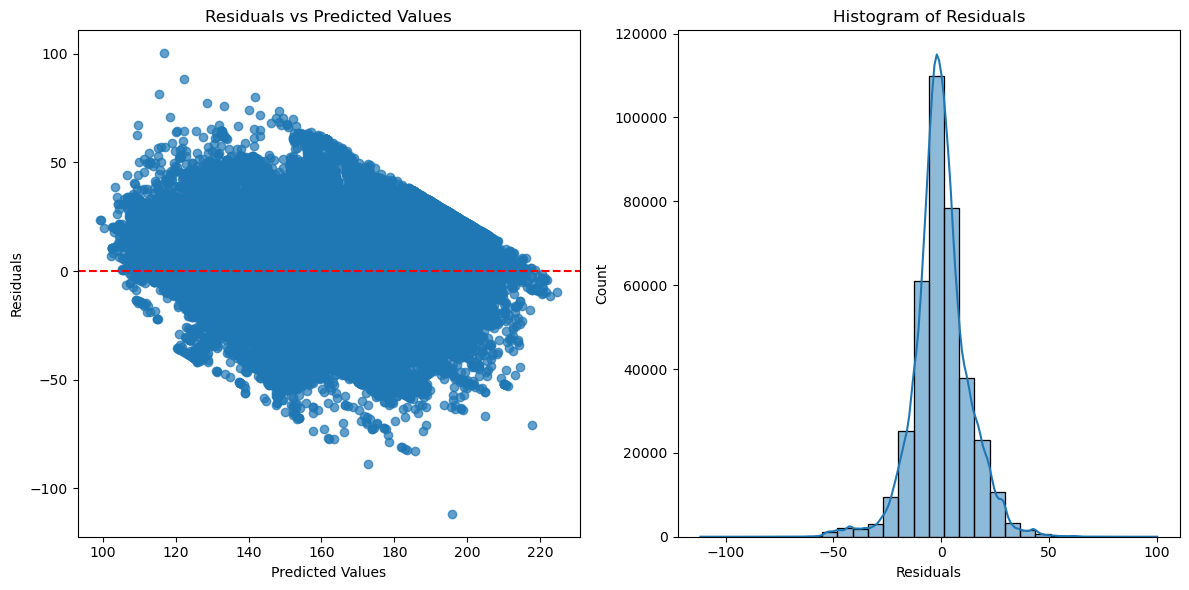

In [296]:

# Calculate residuals
residuals = y_test - y_pred

# Create a figure
plt.figure(figsize=(12, 6))

# Scatter plot of residuals vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)  # Kernel Density Estimate for smoother curve
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# I have to get rid of the outliers, there should be a quantile transformation before head 

In [303]:
a = 2 
b = 3 


In [304]:
print(a)
print(b)

2
3


In [305]:
c = b

In [307]:
print(c)

2
